# Prävalenz von Infektionskrankheiten im Verlauf der Zeit

Gruppenmitglieder: Dennis Bailer, Noémie Frochaux, David Brunner

Fragen:
- Wie ist die Prävalenz von verschiedenen Infektionskrankheiten?
- Warum nehmen gewisse Krankheiten zu- und ab?
- Wir vergleichen die 3 Infektionskrankheiten mit der höchsten Prävalenz.

Quelle: https://ourworldindata.org/grapher/the-number-of-cases-of-infectious-diseases

## 1. Daten beschaffen und laden

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [25]:
df = pd.read_csv('Daten Infections Final.csv', skiprows=1,
                 names=['Year','Disease','Prevalence']) 
df.head()

,Year,Disease,Prevalence
0,1920,Smallpox,401318
1,1921,Smallpox,303850
2,1922,Smallpox,190159
3,1923,Smallpox,174799
4,1924,Smallpox,186354


## 2. Daten Vorbereiten

In [26]:
df_pivot = df.pivot(index='Year', columns='Disease', values='Prevalence')
df_pivot

Disease,Cholera,Guinea worm,HIV/AIDS,Malaria,Paralytic polio,Rabies,Smallpox,Tuberculosis,Yaws
Year,,,,,,,,,
1920,NaN,NaN,NaN,NaN,NaN,NaN,401318.0,NaN,NaN
1921,NaN,NaN,NaN,NaN,NaN,NaN,303850.0,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN,NaN,190159.0,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN,NaN,174799.0,NaN,NaN
1924,NaN,NaN,NaN,NaN,NaN,NaN,186354.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020,323369.0,27.0,1730000.0,244890000.0,8771.0,10352.0,NaN,8440000.0,NaN
2021,223370.0,15.0,1650000.0,249120000.0,4858.0,10181.0,NaN,8410000.0,NaN
2022,NaN,13.0,NaN,NaN,6370.0,NaN,NaN,NaN,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:

- Die Spalte Disease enthält 9 verschiedene Krankheiten
- Es sind Daten zwischen 1920 und 2024 vorhanden. Die Daten sind komplett.
- Die Prävalenz streut zwischen 2 und 257'350'000 Menschen

In [27]:
df.dtypes

Year           int64
Disease       object
Prevalence     int64
dtype: object

### 3.1 Historische Trends bei Infektionskrankheiten
Hier stellen wir die Grafik von Our world in data selbst dar:

(1, np.float64(654634487.9902737))

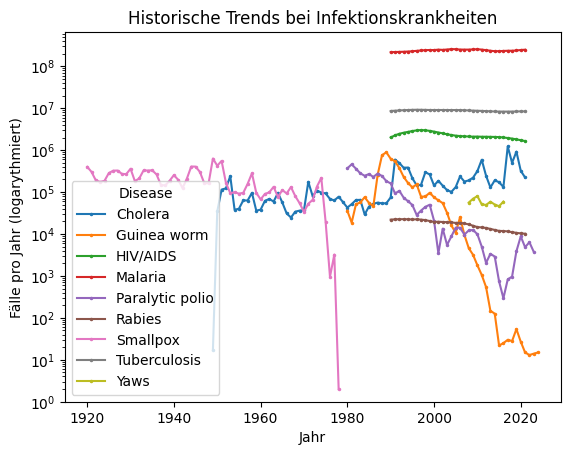

In [28]:
df_Krankheit=df_pivot[['Cholera','Guinea worm','HIV/AIDS','Malaria','Paralytic polio','Rabies','Smallpox','Tuberculosis','Yaws']]
df_Krankheit.plot(title='Historische Trends bei Infektionskrankheiten', logy=True, marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr (logarythmiert)')
plt.ylim(bottom=1)

### 3.2 Analyse Krankheiten

In [29]:
print("Anzahl verschiedener Infektionskrankheiten:", df["Disease"].nunique())

Anzahl verschiedener Infektionskrankheiten: 9


In [30]:
df["Disease"].value_counts()

Disease
Cholera            73
Smallpox           59
Guinea worm        45
Paralytic polio    44
Malaria            32
Tuberculosis       32
HIV/AIDS           32
Rabies             32
Yaws                9
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Infektionskrankheit'}, xlabel='Die analysierten Krankheiten', ylabel='Anzahl Datenpunkte'>

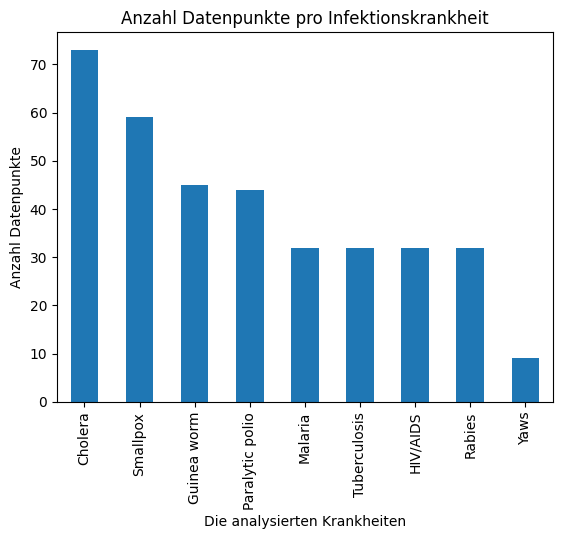

In [31]:
df['Disease'].value_counts().plot(kind='bar',
                                  xlabel='Die analysierten Krankheiten',
                                  ylabel='Anzahl Datenpunkte',
                                  title='Anzahl Datenpunkte pro Infektionskrankheit')

### 3.3 Analyse Jahr

In [32]:
print('Anzahl verschiedener Jahre: ', len(df['Year'].unique()))

Anzahl verschiedener Jahre:  105


In [ ]:
df['Year'].value_counts().sort_index()

Year
1920    1
1921    1
1922    1
1923    1
1924    1
       ..
2020    7
2021    7
2022    2
2023    2
2024    1
Name: count, Length: 105, dtype: int64

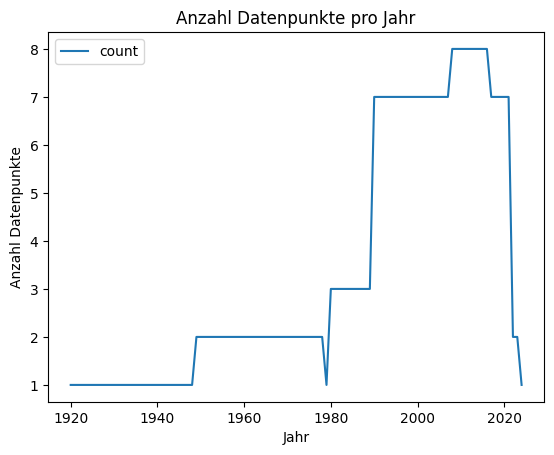

In [45]:
g = df['Year'].value_counts().sort_index().plot(
        ylabel='Anzahl Datenpunkte',
        xlabel='Jahr',
        title='Anzahl Datenpunkte pro Jahr')
g.legend()

### 3.4 Analyse Prävalenz

Eine grafische Darstellung der Prävalenzdaten ist nicht in einer aussagekräftigen Form möglich, weshalb wir uns dagegen entschieden haben. 

## 4 Analyse
### 4.1 Einzelanalyse der Infektionskrankheiten
#### 4.1.1 Cholera

(0.0, 1291499.15)

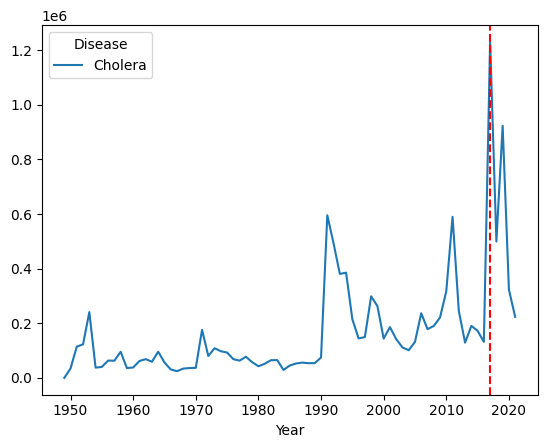

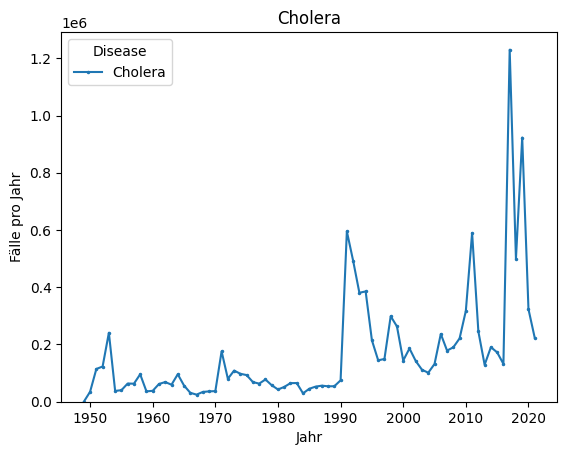

In [68]:
df_Krankheit=df_pivot[['Cholera']]
ax=df_Krankheit.plot()
df_Krankheit.plot(title='Cholera', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#1f77b4', ) 
ax.axvline(x=2017, color='red', linestyle='--', label='Jemens Bürgerkrieg')
plt.ylim(bottom=0)




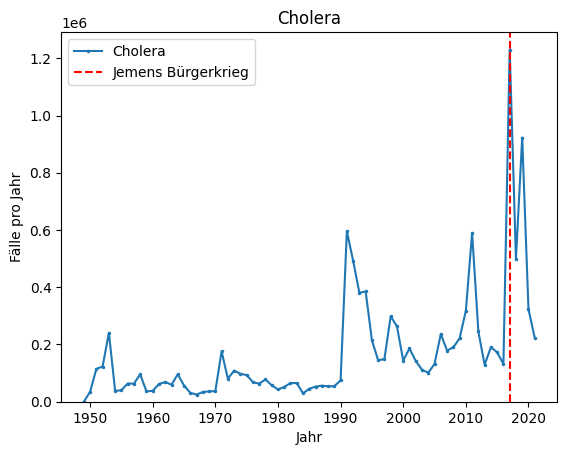

In [56]:
import matplotlib.pyplot as plt

df_Krankheit = df_pivot[['Cholera']]
ax = df_Krankheit.plot(title='Cholera', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False)
ax.axvline( x=2017, color='red', linestyle='--', label='Jemens Bürgerkrieg' )

plt.ylim(bottom=0)
plt.legend()
plt.show()


Cholera ist eine Bakterielle Infektionskrankheit des Darmes, ist seit Jahrhunderten ein Problem. Ausgelöst wird sie durch das Bakterium Vibrio cholerae. Die systematische Bekämpfung und statistische Erfassung erfolgte zum ersten Mal 1854 in London und gilt als gründungsstein der modernen Epidemiologie.

Die Krankheitssymptome sind simpel: Fieber und sehr starker Brechdurchfall. Dies führt direkt zu einem hohen Elektrolytverlust und einer starken Dehydration, welche in der Regel auch die Todesursachen sind. Es ist deshalb sehr wichtig im Krankheitsschub den betroffenen Menschen ausreichend mit Wasser und Elektrolyten zu versorgen. Die WHO empfiehlt das einnehmen einer Trinklösung aus folgenden Bestandteilen: Wasser, Glukose, Natriumcitrat, Natriumchlorid (Kochsalz) und Kaliumchlorid. Oft sind die Patienten aber nicht im Stande zu trinken, deshalb muss man oft die Flüssigkeitsabgabe intravenös verabreichen. Unterstützend zur Flüssigkeitszufuhr verabreicht man auch Antibiotika.

Die Übertragung erfolgt primär über fäkalienverunreinigtes Trinkwasser. Auch kontaminierte Lebensmittel können es auslösen. Die Bakterienlast muss aber relativ hoch sein, da die Magensäure das Bakterium relativ gut abtötet. In nur etwa 15% der Fälle führt die Infektion auch zur Krankheit, der Rest verläuft asymptomatisch. Essenzeill zur Verhinderung der Infektionen sind sauberes Trinkwasser und gute Hygiene.

Da die Krankheit wie so oft primär in Entwicklungs- und Schwellenländer auftritt, und ein Teil der Infektionen asymptomatisch verläuft, ist die statistische Erfassung oft sehr schwierig und die Dunkelziffer ist hoch. Seit 1961 befinden wir uns in der 7. Pandemie, bei der es immer wieder zu lokalen bis internationalen Ausbrüchen kommt. Der markierte Spike in 2017 ist von der grössten Epidemie der Geschichte im Jemen und ist auf den lokalen Bürgerkrieg zurückzuführen.


#### 4.1.2 Medinawurm/Guineawurm

(1, np.float64(1556732.691665652))

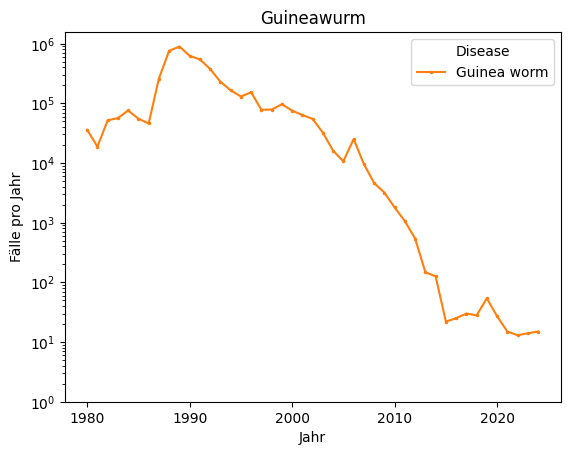

In [36]:
df_Krankheit=df_pivot[['Guinea worm']]
df_Krankheit.plot(title='Guineawurm', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=True, color='#ff7f0e')
plt.ylim(bottom=1)

Der Medinawurm, auch Guineawurm(Dracunculus medinensis)  genannt, ist ein Parasit der zu den Fadenwürmern gehört. Der Medinawurm kommt hauptsächlich in den tropischen Regionen von Afrika und Südostasien vor. Die Würmer gelangen über unsauberes Trinkwasser als Larven in Ruderfusskrebsen in das System des Wirtes. Nach der Aufnahme entwickeln sich die Larven im Körper des Wirtes weiter. Nach einem Jahr wandert der weibliche Wurm zur Hautoberfläche, meist an den Beinen oder Füßen, und verursacht dort schmerzhafte Blasen und offene Wunden. Der weibliche Wurm kann bis zu einem Meter lang werden.

Eine medikamentöse Behandlung gegen den Medinawurm existiert bislang nicht. Die Therapie besteht vor allem darin, den Wurm über mehrere Tage vorsichtig aus dem Körper zu entfernen, in dem dieser um ein Stöckchen gewickelt wird und jeden Tag um ein paar Zentimeter herausgezogen wird. Die Erkrankung ist zwar selten tödlich, kann jedoch zu langfristigen gesundheitlichen Beeinträchtigungen führen.

Seit den 1980er-Jahren unternimmt die Weltgesundheitsorganisation (WHO), große Anstrengungen, um den Medinawurm weltweit auszurotten. Durch Maßnahmen wie die Bereitstellung von sauberem Trinkwasser, Gesundheitsaufklärung und die Überwachung von Infektionsfällen konnte die Zahl der Erkrankungen drastisch reduziert werden. 

Den Erfolg dieser Massnahmen zeigen auch unsere Daten. Wir haben uns für eine Darstellung entschieden, bei der die Y-Achse Logarithmiert ist, dies vereinfacht es auch den Verlauf der niedrigeren Werte der letzten Jahre zu sehen. Es ist gut zu sehen, dass die Prävalenz seit dem Höchstwert im Jahr 1989 am Abnehmen ist und die Bestrebungen der WHO offensichtlich Erfolg zeigen.


#### 4.1.3 HIV/AIDS

<Axes: title={'center': 'HIV/AIDS'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

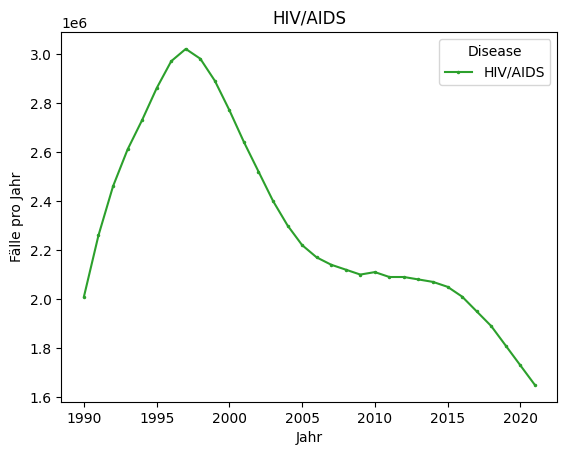

In [37]:
df_Krankheit=df_pivot[['HIV/AIDS']]
df_Krankheit.plot(title='HIV/AIDS', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#2ca02c')

AIDS (Acquired Immunodeficiency Syndrome) ist eine weltweit verbreitete virale Infektionskrankheit, die durch HIV (Humane Immundefizienz Virus) verursacht wird. Das Virus befällt das Immunsystem des Menschen, insbesondere die CD4-T-Helferzellen. Betroffen sind Menschen aller Altersgruppen, wobei in vielen Regionen junge Erwachsene besonders häufig infiziert sind. Dies, da der Häufigste Infektionsweg ungeschützter Geschlechtsverkehr oder anderer Austausch von Körperflüssigkeiten ist. Zu Beginn der Infektion treten oft keine oder nur unspezifische Symptome auf. Unbehandelt schreitet die Erkrankung jedoch fort und schwächt das Immunsystem zunehmend, sodass selbst harmlose Infektionen lebensbedrohlich werden können. 

Eine vollständige Heilung von HIV ist bislang nicht möglich, jedoch lässt sich die Erkrankung durch eine antiretrovirale Therapie (ART) sehr effektiv behandeln. Bei konsequenter Einnahme der Medikamente kann die Viruslast stark gesenkt werden, wodurch Betroffene ein nahezu normales Leben führen und das Virus nicht mehr weitergeben.

Seit den 1980er-Jahren engagieren sich internationale Organisationen wie die WHO und UNAIDS intensiv im Kampf gegen HIV. In vielen Industriestaaten ist es gelungen, durch Aufklärung, Prävention und einen guten Zugang zu Medikamenten die Zahl der Neuinfektionen deutlich zu reduzieren. In Entwicklungs- und Schwellenländern stellt die Bekämpfung der Krankheit jedoch weiterhin eine große Herausforderung dar, da Armut, mangelnde medizinische Versorgung und gesellschaftliche Stigmatisierung den Zugang zu Prävention und Therapie erschweren. 

In unserer Auswertung der Daten, ist gut zu sehen, dass die Prävalenz seit 1997 kontinuierlich abgenommen hat. Auch wenn die Anzahl der Infektionen weiterhin Hoch ist, ist es sehr klar ersichtlich, dass die Bestrebungen der WHO und UNAIDS deutlich Wirkung zeigen.


#### 4.1.4 Malaria

<Axes: title={'center': 'Malaria'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

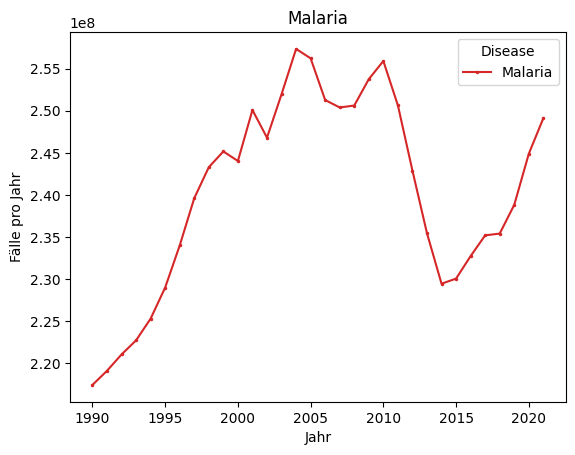

In [38]:
df_Krankheit=df_pivot[['Malaria']]
df_Krankheit.plot(title='Malaria', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#d62728')

#### 4.1.5 Polio (Kinderlähmung)

(1, np.float64(664715.7207160543))

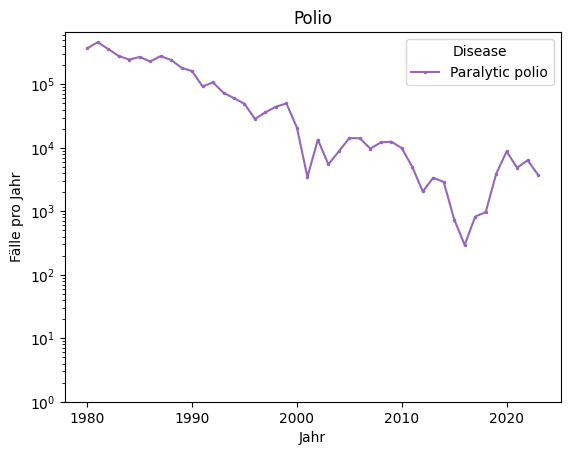

In [39]:
df_Krankheit=df_pivot[['Paralytic polio']]
df_Krankheit.plot(title='Polio', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=True, color='#9467bd')
plt.ylim(bottom=1)

Polio – oder Poliomyelitis – ist eine virale Infektionskrankheit, die vor allem Kinder unter fünf Jahren betrifft. Das Virus wird meist über verunreinigtes Wasser oder engen Kontakt übertragen. Die Infektion verläuft häufig ohne Symptome, kann aber in seltenen Fällen schwere und dauerhafte Lähmungen verursachen. Heilbar ist Polio nicht, jedoch lässt sich die Krankheit durch Impfungen sehr gut verhindern. Die entscheidenden Impfstoffe wurden in den 1950er- und 1960er-Jahren entwickelt und führten weltweit zu einem drastischen Rückgang der Fälle.

Die statistische Erfassung der Krankheit ist jedoch schwierig:

- Viele Infektionen verlaufen unbemerkt und werden nie offiziell gemeldet.
- In Regionen mit schwachem Gesundheitssystem fehlen verlässliche Meldestrukturen.
- Zusätzliche Komplikationen entstehen durch impfstoff-abgeleitete Polioviren, die selten auftreten und getrennt erfasst werden müssen.

Seit 1988 versucht die WHO, Polio weltweit auszurotten. Große Teile der Welt gelten bereits als poliofrei, doch Konflikte, fehlendes Vertrauen in Impfprogramme und schwer erreichbare Bevölkerungsgruppen erschweren die vollständige Eliminierung. Die verfügbaren Statistiken – etwa jene von Our World in Data – zeigen den starken Rückgang der Fälle, sind aufgrund der genannten Erfassungsprobleme jedoch nur begrenzt aussagekräftig.

#### 4.1.6 Rabies (Tollwut)

<Axes: title={'center': 'Tollwut'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

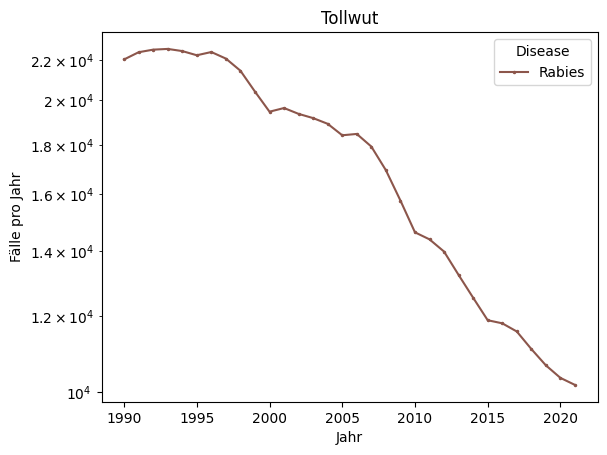

In [40]:
df_Krankheit=df_pivot[['Rabies']]
df_Krankheit.plot(title='Tollwut', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=True, color='#8c564b')

Tollwut ist eine virale Infektionskrankheit, die durch das Rabiesvirus ausgelöst wird und fast immer tödlich verläuft, sobald Symptome auftreten. Die Übertragung erfolgt meist durch den Biss eines infizierten Tieres – weltweit vor allem durch Hunde, in Europa häufiger durch Wildtiere wie Füchse oder Fledermäuse. Die Krankheit befällt das zentrale Nervensystem und führt nach zunächst unspezifischen Symptomen rasch zu neurologischen Störungen, Lähmungen und schließlich zum Tod. Eine Behandlung ist nach Ausbruch der Symptome praktisch unmöglich, jedoch kann eine sofortige Impfung nach einem Biss (Postexpositionsprophylaxe) zuverlässig verhindern, dass die Krankheit ausbricht.

Die statistische Erfassung ist schwierig:
- Viele Fälle treten in abgelegenen Regionen auf, wo medizinische Versorgung und Meldesysteme fehlen.
- Viele Todesfälle werden nicht als Tollwut erkannt, da Symptome anderen neurologischen Erkrankungen ähneln können.
- In ärmeren Ländern wird häufig nicht bestätigt, ob der auslösende Tierbiss von einem infizierten Tier stammte.

Die WHO führt Programme zur Eliminierung der hundeübertragenen Tollwut durch, insbesondere durch groß angelegte Impfkampagnen bei Hunden. Trotz Fortschritten sterben jährlich noch Zehntausende Menschen an Tollwut, vor allem in Afrika und Asien. Globale Statistiken – wie jene von Our World in Data – zeigen Trends, sind aber wegen erheblicher Untererfassung nur eingeschränkt aussagekräftig.



#### 4.1.7 Pocken

(0.0, 664500.8)

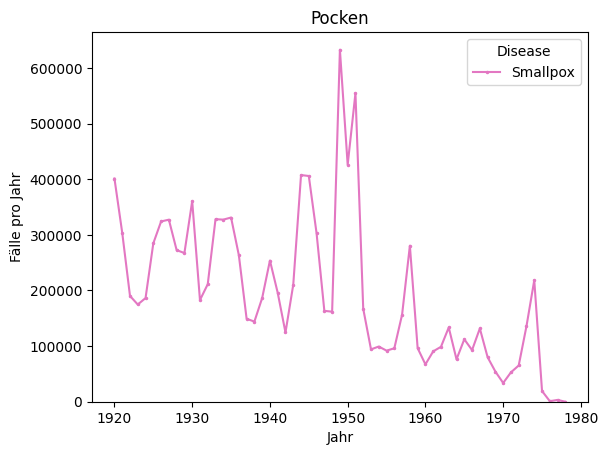

In [41]:
df_Krankheit=df_pivot[['Smallpox']]
df_Krankheit.plot(title='Pocken', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#e377c2')
plt.ylim(bottom=0)

Pocken sind eine hoch ansteckende virale Infektionskrankheit, die durch das Variola-Virus verursacht wird. Die Übertragung erfolgt hauptsächlich durch Tröpfcheninfektion, direkten Kontakt mit infizierten Personen oder kontaminierten Gegenständen. Betroffen waren Menschen aller Altersgruppen. Nach einer Inkubationszeit von ein bis zwei Wochen treten zunächst grippeähnliche Symptome wie Fieber, Kopf- und Gliederschmerzen auf. Im weiteren Verlauf entwickelt sich ein charakteristischer Hautausschlag mit eitrigen Pusteln, was häufig zu Narbenbildung führte. Die Krankheit verläuft oft schwer und ist mit einer hohen Sterblichkeitsrate verbunden. Nach einer überstandenen Infektion sind die Betroffenen jedoch in der Regel lebenslang immun.

Eine spezifische medikamentöse Therapie gegen Pocken existiert nicht. Entscheidend für die Bekämpfung der Krankheit war die Entwicklung und weltweite Anwendung eines wirksamen Impfstoffs. Impfstoffe für Pocken gehören zu den ältesten Impfstoffen, die die Menschheit kennt. Erste Hinweise auf Pockenimpfungen gibt es bereits seit c.a. 1000 n.Chr. Die Pockenimpfung bot einen zuverlässigen Schutz und spielte eine zentrale Rolle bei der Eindämmung und Ausrottung der Krankheit. 

Seit der Gründung der Weltgesundheitsorganisation (WHO) wurden umfassende internationale Impfprogramme zur Ausrottung der Pocken durchgeführt. Diese Bemühungen führten dazu, dass die Krankheit weltweit systematisch zurückgedrängt wurde. Im Jahr 1980 erklärte die WHO die Pocken offiziell als ausgerottet. Damit sind sie bis heute die einzige Infektionskrankheit des Menschen, die durch gezielte globale Maßnahmen vollständig eliminiert werden konnte, und gelten als Meilenstein in der Geschichte der Medizin und der internationalen Gesundheitszusammenarbeit.

In der Grafik ist gut zu sehen, dass die Prävalenz im 20.jarhundert sehr Abwechslungsreich verlief. Seit dem Höchststand um 1949 ist die Prävalenz aber immer weiter gefallen, bis die Krankheit schliesslich 1980 als Ausgerottet erklärt wurde. Wir haben und bei der Darstellung dieser Daten bewusst dazu entschieden die Y-Achse nicht zu Logarithmieren, um die sprunghaften Anstiege der Prävalenz besser Darstellen zu können. Da die Krankheit von der WHO im Jahre 1980 als ausgerottet erklärt wurde, gibt es seither auch keine Datenpunkte mehr.


#### 4.1.8 Tuberkulose

<Axes: title={'center': 'Tuberkulose'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

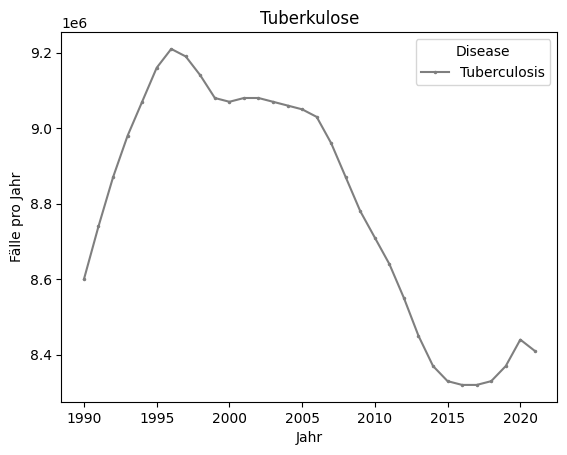

In [42]:
df_Krankheit=df_pivot[['Tuberculosis']]
df_Krankheit.plot(title='Tuberkulose', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#7f7f7f')


Tuberkulose ist eine bakterielle Infektionskrankheit, die durch Mycobacterium tuberculosis verursacht wird und vor allem die Lunge befällt. Sie ist eine der ältesten bekannten Infektionskrankheiten der Menschheit und zählt bis heute zu den weltweit tödlichsten Infektionen. Die Krankheit wird über die Luft übertragen – meist durch Husten oder Sprechen – und betrifft Menschen aller Altersgruppen, jedoch besonders solche mit geschwächtem Immunsystem oder schlechten Lebensbedingungen.

Typische Symptome sind langanhaltender Husten, Fieber, Gewichtsverlust und Nachtschweiß. Unbehandelt kann TB schwere Lungenschäden verursachen oder sich im Körper ausbreiten. Im Gegensatz zu vielen anderen Infektionskrankheiten ist Tuberkulose heilbar, jedoch erfordert die Behandlung eine mehrmonatige Kombinationstherapie aus mehreren Antibiotika. Seit den 1950er-Jahren existieren wirksame Medikamente, doch die Therapie bleibt aufgrund ihrer Länge und Nebenwirkungen herausfordernd.

Die statistische Erfassung ist komplex:
- Viele Menschen haben eine latente TB-Infektion, die keine Symptome verursacht und oft nicht erkannt wird.
- In ärmeren Ländern fehlt der Zugang zu Diagnostik, weshalb Fälle häufig zu spät oder gar nicht gemeldet werden.
- Medikamentenresistente Formen (MDR-TB und XDR-TB) werden nicht in allen Ländern zuverlässig erfasst und machen die Auswertung der Daten schwieriger.
- TB wird stark von sozialen Faktoren wie Armut, Überbelegung oder HIV-Koinfektionen beeinflusst, was die Interpretation der Statistik erschwert.

Die WHO führt seit Jahrzehnten Programme zur globalen Bekämpfung von Tuberkulose durch. Trotz medizinischer Fortschritte ist TB weiterhin eine der weltweit führenden Todesursachen durch Infektionskrankheiten. Besonders relevant ist die enge Verbindung zwischen Tuberkulose und HIV: Menschen mit HIV haben ein stark erhöhtes Risiko, eine aktive TB zu entwickeln, was TB zu einem der gefährlichsten Begleiterkrankungen von HIV macht.

Die Daten – etwa von Our World in Data – zeigen einen stetigen, aber langsamen Rückgang der weltweiten TB-Fälle und -Todesfälle. Die Aussagekraft bleibt jedoch aufgrund von Unterdiagnosen, regionalen Unterschieden und der Existenz resistenter Erreger begrenzt. Dennoch bildet die TB-Statistik eine wichtige Grundlage für Vergleiche mit anderen globalen Gesundheitsbedrohungen wie Malaria und HIV.

#### 4.1.9 Frambösie

<Axes: title={'center': 'Frambösie'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

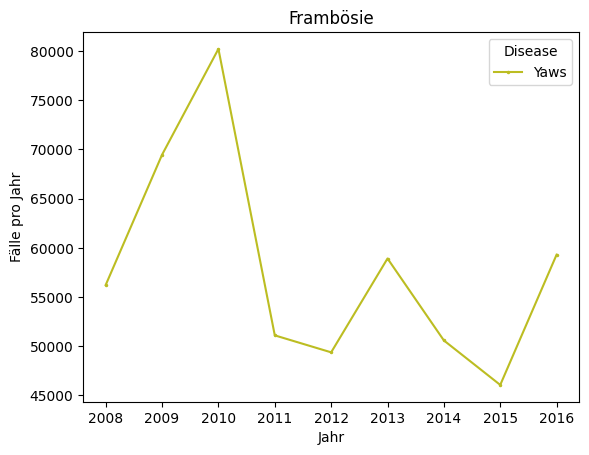

In [43]:
df_Krankheit=df_pivot[['Yaws']]
df_Krankheit.plot(title='Frambösie', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#bcbd22')

Frambösie oder auf englisch "Yaws" ist eine tropische bakterielle Infektionskrankheit, die durch das Bakterium Treponema pertenue ausgelöst wird. Kinder zwischen 6 bis 10 Jahren sind am meisten von dieser Krankheit betroffen. Die Bakterien befallen zunächst nur die Haut, unbehandelt breitet sich das Bakterium aber weiter auf das Skelettsystem aus. Dort verursacht es schwerwiegende und bleibende Deformationen. Medikamentös kann man es relativ einfach mit Antibiotika behandeln. 

Die statistische Erfassung gestaltet sich als relativ schwierig aus folgenden Gründen:
- Das Bakterium, welches die Krankheit auslöst, ist stark verwandt mit dem Siphillis-Erreger (Die Gene unterscheiden sich nur um etwa 0.2%). Man vermutet deshalb, dass die Krankheit oft verwechselt wird.
- Es kommt häufiger in abgelegenen Gebieten mit mangelhafter medizinischer Versorgung vor und wird mit Armut, schlechten sanitären Einrichtungen und der dadurch resultierenden mangelnder Körperhygiene in Verbindung gebracht. 

Die WHO hat seit ihrer Gründung schon mehrere Versuche unternommen die Krankheit zu eliminieren. In den Industriestaaten hat dies auch schon relativ gut geklappt, in den Entwicklungs- und Schwellenländer gestaltet sich das aber wegen den oben genannten Punkten relativ schwierig. Es gibt zwar immer wieder Programme und Kampagnen dagegen, diese wurden aber jeweils zu Früh abgebrochen oder abgeschlossen, sodass die Krankheit leider nie komplett ausgerottet wurde. Einen Lichtblick gibt es trotzdem: Indien gilt seit 2016 als offiziell Frambösiefrei.

Unser Statistikschnipsel, den wir in dieser Arbeit hier präsentieren, ist also wegen der schwierigen Erfassung, der Verwechslung mit Syphillis und vielen anderen Faktoren relativ wenig aussagend über die Krankheit.

### 4.2 Vergleich Tuberkulose, HIV und Malaria

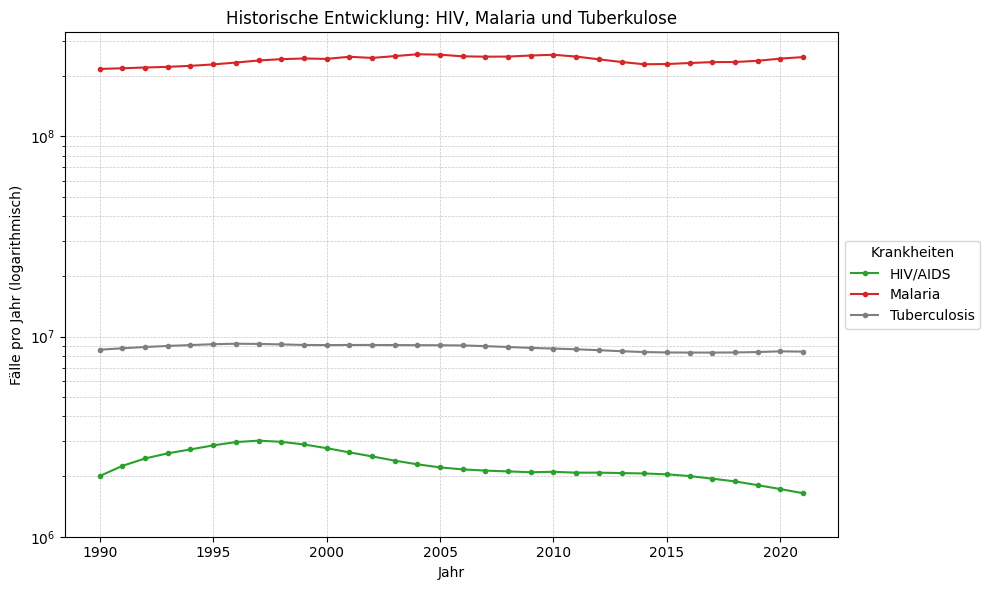

In [49]:
df_Krankheit = df_pivot[['HIV/AIDS', 'Malaria', 'Tuberculosis']]

df_Krankheit = df_pivot[['HIV/AIDS', 'Malaria', 'Tuberculosis']].dropna(how='all')

fig, ax = plt.subplots(figsize=(10, 6))

df_Krankheit.plot(
    ax=ax,
    title='Historische Entwicklung: HIV, Malaria und Tuberkulose',
    marker='o',
    markersize=3,
    linewidth=1.5,
    xlabel='Jahr',
    ylabel='Fälle pro Jahr (logarithmisch)',
    logy=True,
    color=['#2ca02c', '#d62728', '#7f7f7f']
)

ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

ax.legend(title='Krankheiten', loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(bottom=1000000)

plt.tight_layout()
plt.show()

Wir haben uns dazu entschieden die y-Achse zu logarithmieren, da ein Vergleich der Daten aufgrund der hohen nummerischen Werte sonst nicht möglich gewesen wäre. Den Startpunkt der y-Achse haben wir bei 10^6 gewählt, damit das Diagramm nicht unnötig komprimiert wird und die Veränderung der Daten besser sichtbar sind.

#### 4.2.1 Ab wann gibt es Datenpunkte?

Die im Datensatz verfügbaren Werte zu HIV, Malaria und Tuberkulose setzen erst ab etwa 1990 konsistent ein. Ein Vergleich früherer Zeiträume ist damit nicht möglich. Alle drei Krankheiten weisen jedoch ab diesem Zeitpunkt klar erkennbare Trends und charakteristische Verläufe auf.

Für HIV/AIDS beginnt die Erfassung im vorliegenden Datensatz Ende der 1980er- bis frühen 1990er-Jahre. Malaria und Tuberkulose erscheinen ab demselben Zeitraum, wobei die Datenqualität und Kontinuität für alle drei Krankheiten ab 1990 ausreichend gegeben ist. Tuberkulose weist keine historischen Daten vor dieser Zeit auf, weshalb langfristige Entwicklungen über mehrere Jahrzehnte hinweg nicht abgebildet werden können.

#### 4.2.2 Trends und Verlauf

HIV zeigt im Datensatz einen deutlichen Anstieg ab Beginn der 1990er-Jahre, gefolgt von einer Phase hoher Fallzahlen und anschließend einem Rückgang ab den 2000er-Jahren. Diese Entwicklung führt zu einer markanten Kurve mit einem klar erkennbaren Höhepunkt.

Malaria tritt im Vergleich mit deutlich höheren Fallzahlen auf und dominiert das Diagramm über den gesamten Zeitraum hinweg. Ab Mitte der 2000er-Jahre ist ein ausgeprägter Rückgang sichtbar, während die Jahre davor durch hohe und teilweise schwankende Werte geprägt sind.

Tuberkulose weist im Gegensatz dazu eine relativ gleichmäßige Entwicklung auf. Die Fallzahlen verändern sich nur langsam und zeigen einen moderaten Abwärtstrend über den gesamten Zeitraum hinweg. Die Kurve ist weniger dynamisch als jene von HIV oder Malaria.

#### 4.2.3 Vergleichbarkeit

Die drei Erkrankungen unterscheiden sich sowohl in der Größenordnung der Fallzahlen als auch in der Form ihrer zeitlichen Verläufe. Malaria tritt in wesentlich höheren Größenordnungen auf als HIV oder Tuberkulose, wodurch eine lineare Darstellung die Unterschiede überdeckt. Eine logarithmische y-Achse ist daher notwendig, um Trends visuell angemessen miteinander zu vergleichen.

Darüber hinaus unterscheiden sich die Krankheiten hinsichtlich der Datenqualität: HIV und Tuberkulose weisen vergleichsweise glatte und stabiles Datenreihen auf, während Malaria stärkere jährliche Schwankungen zeigt. Die drei Kurven wirken daher unterschiedlich „ruhig“ und lassen sich nur eingeschränkt direkt gegenüberstellen.

#### 4.2.4 Fazit

HIV entwickelt sich im Datensatz von einem steilen Anstieg zu einem rückläufigen Trend, Malaria zeigt nach langjährig hohen Fallzahlen einen deutlichen Abfall, und Tuberkulose verläuft vergleichsweise stabil mit einem langsamen Rückgang. Trotz ihres gemeinsamen Erfassungsbeginns um 1990 sind direkte Vergleiche nur begrenzt möglich, insbesondere aufgrund der stark unterschiedlichen Fallzahlbereiche und der variierenden Datengüte.

## 4.3 Historischer Vergleich von HIV, Malaria und Tuberkulose (über unsere Datensätze hinaus)

Ein historischer Blick über die vorhandenen Datensätze hinaus zeigt, dass HIV, Malaria und Tuberkulose sehr unterschiedliche epidemiologische Entwicklungen durchlaufen haben. Tuberkulose ist seit Jahrhunderten bekannt und war bis weit ins 20. Jahrhundert eine der führenden Todesursachen weltweit, bevor die Einführung wirksamer Antibiotika in den 1950er- und 1960er-Jahren zu einem drastischen Rückgang der Sterblichkeit führte. Malaria begleitet die Menschheit ebenfalls seit der Antike, blieb jedoch trotz verschiedener Eindämmungsversuche lange weit verbreitet. Erst mit der Einführung von Insektizid-behandelten Moskitonetzen, verbesserten Diagnosetests und Artemisinin-basierten Kombinationstherapien ab den 2000er-Jahren begann ein deutlicher Rückgang der Erkrankungszahlen.

HIV hingegen stellt eine vergleichsweise junge Erkrankung dar, deren globale Verbreitung erst Anfang der 1980er-Jahre erfasst wurde. Die Pandemie erreichte Mitte der 1990er-Jahre ihren Höhepunkt, bevor die Einführung hochwirksamer antiretroviraler Therapien (ART) 1996 einen Wendepunkt markierte und die Sterblichkeit weltweit deutlich senkte. Während Tuberkulose und Malaria über Jahrhunderte hinweg von öffentlichen Gesundheitsmaßnahmen und medizinischen Innovationen geprägt wurden, zeigt HIV eine rasante globale Ausbreitung innerhalb weniger Jahrzehnte und eine ebenso schnelle medizinische Antwort.

Im historischen Gesamtvergleich wird deutlich, dass alle drei Krankheiten durch spezifische medizinische Durchbrüche, globale Gesundheitsprogramme und gesellschaftliche Rahmenbedingungen geprägt wurden. Die unterschiedlichen Zeitpunkte und Mechanismen dieser Wendepunkte erklären die charakteristischen Unterschiede in den langfristigen epidemiologischen Verläufen.

## 5 Quellen

- https://ourworldindata.org/grapher/the-number-of-cases-of-infectious-diseases (Daten)
- https://www.who.int/news-room/fact-sheets/detail/poliomyelitis (Polio)
- https://www.cdc.gov/polio/what-is-polio/history.html (Polio)
- https://polioeradication.org (Polio)
- https://www.cdc.gov/rabies/index.html (Tollwut)
- https://www.who.int/news-room/fact-sheets/detail/rabies (Tollwut)
- https://www.who.int/initiatives/end-rabies (Tollwut)
- https://www.who.int/news-room/fact-sheets/detail/tuberculosis (Tuberkulose)
- https://www.cdc.gov/tb/topic/basics/default.htm (Tuberkulose)
- https://www.who.int/teams/global-tuberculosis-programme (Tuberkulose)
- https://www.who.int/news-room/fact-sheets/detail/tuberculosis (Historischer Vergleich HIV, Malaria und TB)
- https://www.cdc.gov/tb/worldtbday/history.htm (Historischer Vergleich HIV, Malaria und TB)
- https://www.who.int/news-room/fact-sheets/detail/malaria (Historischer Vergleich HIV, Malaria und TB)
- https://www.cdc.gov/malaria/about/history/index.html (Historischer Vergleich HIV, Malaria und TB)
- https://www.who.int/news-room/fact-sheets/detail/hiv-aids (Historischer Vergleich HIV, Malaria und TB)
- https://www.unaids.org/en/resources/documents/2020/unaids-data (Historischer Vergleich HIV, Malaria und TB)
- https://hivinfo.nih.gov/understanding-hiv/fact-sheets/hiv-timeline (Historischer Vergleich HIV, Malaria und TB)
- https://tropeninstitut.de/krankheiten-a-z/medinawurm (Medinawurm)
- https://www.who.int/news-room/fact-sheets/detail/dracunculiasis-guinea-worm-disease (Medinawurm)
- https://www.cdc.gov/parasites/guineaworm/index.html (Medinawurm)
- https://www.cartercenter.org/health/guinea_worm/index.html (Medinawurm)
- https://www.who.int/health-topics/hiv-aids (HIV/AIDS)
- https://www.cdc.gov/hiv/basics/index.html (HIV/AIDS)
- https://www.unaids.org/en/resources/fact-sheet (HIV/AIDS)
- https://www.who.int/news-room/fact-sheets/detail/smallpox (Pocken)
- https://www.cdc.gov/smallpox/about/index.html (Pocken)